# Task 1: Image compression with K-means

Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg" for various K (see slides for details). As a feature vector use RGB-representation of each pixel from the image. 
<br>
Analyse running time, what could you suggest to improve it? 
Compare your implementation with the existing k-mean algorithm given in python.

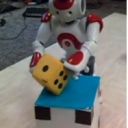

In [1]:
from IPython.display import Image
Image(filename='NAORelease.jpg')

(128, 128, 3)
16384 3
run time: 2.872875690460205


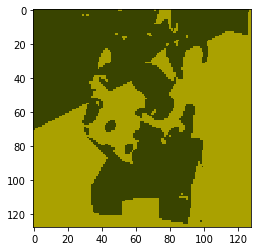

In [4]:
import imageio as im
import numpy as np
import matplotlib.pyplot as plt
import time

tic = time.time()
#input image
image = im.imread('/home/srini/hbrs/Secondsem/machinlearning/Assignments/assignment3/NAORelease.jpg')
# plt.imshow(image)
# plt.show()


image = image/ 255 # for havinbg smaller values.
print(image.shape)
k = 2
#initializing: pick k arbitrary centeroids.
reimage = np.reshape(image, (image.shape[0]*image.shape[1], image.shape[2]))
i ,j = reimage.shape
print(i,j)
mean = np.zeros((k, j))
for b in range(k):
    mean[b, 0] = reimage[np.random.randint(k), 0]
    mean[b, 1] = reimage[np.random.randint(k), 1]
    
# assign each sample to closest centeroid
index = np.zeros(i)
a = 10 #iterations random number

for c in range(a):
    for m in range(len(reimage)):
        distance_value = 100 # assigning lartge value to compare with eucledian distance
        for n in range(k):
            x1 = reimage[m, 0]
            y1 = reimage[m, 1]
            x2 = mean[n, 0]
            y2 = mean[n, 1]
            Ec_dist = np.sqrt(np.square(x1-x2)+np.square(y1-y2))
            if Ec_dist < distance_value:
                distance_value = Ec_dist
                index[m] = n
    #adjust each centeroid to be new mean
    for l in range(k):
        sum_x, sum_y, count = 0,0,0
        for o in range(len(reimage)):
            if (index[o] == l):
                sum_x += reimage[o, 0]
                sum_y += reimage[o, 1]
                count += 1
        if(count == 0):
                count = 1
                
        mean[l, 0] = float(sum_x / count)
        mean[l, 1] = float(sum_y / count)

#compressing image
comp_image = mean[index.astype(int), :]

comp_image = np.reshape(comp_image, (image.shape[0], image.shape[1], image.shape[2]))
toc = time.time()
print("run time:", toc-tic)
plt.imshow(comp_image)
plt.show()

run time: 0.26731228828430176


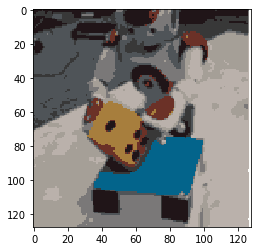

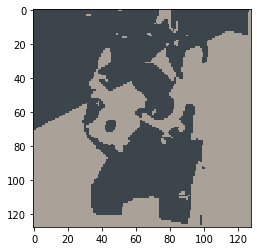

In [3]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
tic = time.time()
img = io.imread('NAORelease.jpg')
img_resize = (img / 255.0).reshape(-1,3)
img_resize
# Fit K-means on the resized image.n_clusters is the desired number of colors.
k_colours = KMeans(n_clusters=10).fit(img_resize)
img_new = k_colours.cluster_centers_[k_colours.labels_]
img_new = np.reshape(img_new,(img.shape))
toc = time.time()
#img_new
print("run time:", toc-tic)
plt.imshow(img_new)
plt.show()

def varying_k(x):
    k_col = KMeans(n_clusters=x).fit(img_resize)
    img_x = k_col.cluster_centers_[k_col.labels_]
    img_x = np.reshape(img_x,(img.shape))
    plt.imshow(img_x)
test = varying_k(2)

It is observed that the runtime when manually implemented is higher than then when implemented via the builtin libraries provided by SKlearn. The runtime variation is nearly 10 times. One could improve the runtime with manual implementation by two ways: a. Varying the iteration. Reducing the iteration, reduces the runtime. b. Varying K.

Both are to check for convergence.

# Task 2: Mixture of Gaussian, EM-Algorithm
Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Dataset 1

[[0.2 0.1]
 [0.1 0.6]]
[2.1 4.5]
[[0.35 0.22]
 [0.22 0.15]]
[2.  2.7]
[[0.06 0.05]
 [0.05 1.3 ]]
[3.5 5.6]
(801, 2)


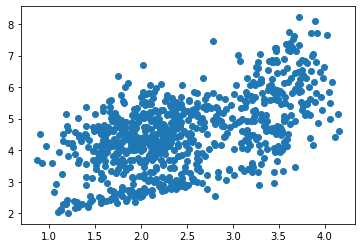

In [4]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
# print(covariances)
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    print(covariances[i])
    print(means[i])
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data2 = data[1:, :]
print(data.shape)
x = data2[:,0]
y = data2[:,1]
plt.scatter(x,y)
plt.show()

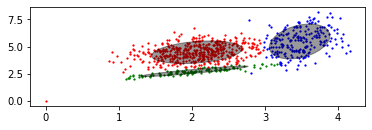

In [6]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
color_iter = itertools.cycle(['blue', 'green', 'red'])
def plot_results(X, Y_, means, covariances,index):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1],1.5, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='black')
#         ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.4)
        splot.add_artist(ell)
    
#     fig, ax = plt.subplots()

#     ax.add_patch(ell)
#     ax.set_aspect('equal')
#     ax.autoscale()
#     plt.show()

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(data2)
plot_results(data, gmm.predict(data), gmm.means_, gmm.covariances_,0)

## Dataset2

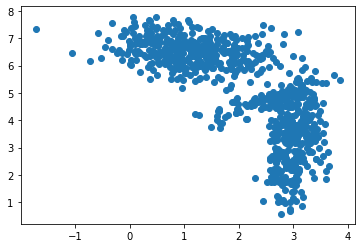

In [7]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[1.1, 6.5],
                  [2.5, 4.7],
                  #[3.0, 2.6],
                  [3.0, 3.3]])
covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
               np.array([[0.35, 0.22], [0.22, 0.20]]),
               #np.array([[0.06, 0.05], [0.05, 1.30]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [4, 1, 3]
factor = 100

data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
        np.random.multivariate_normal(means[i], covariances[i],
                                            size=factor * amplitudes[i])])
data = data[1:, :]

x = data[:,0]
y = data[:,1]
plt.scatter(x,y)
plt.show()

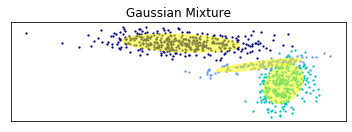

In [14]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 1.5, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='yellow')
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(data)
plot_results(data, gmm.predict(data), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

Visualise the results (plot the samples color coded by fit mixture component, plot ellipsoids for Gaussians)

In [ ]:
# Results
# The output for the Dataset1 can look like: 

<img src="files/04_Exercise1_MoG_EM.png">

Authors:

Shravanthi Arvind Patil<br>
Sreenivasa Hikkal Venugopala